# Caibrating a Camera

### Reading Images

In [82]:
def read_image(filename):
    import cv2
    #print(filename)
    image = cv2.imread(filename)
    return image

def readFiles(folder, images):            
    import os
    import cv2
    for filename in os.listdir(os.getcwd() + folder):
        # do your stuff
        #print(filename)
        image = read_image("." + folder + filename)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images.append(gray)

In [83]:
images = []
readFiles("/camera_cal/", images)

## Plotting the images

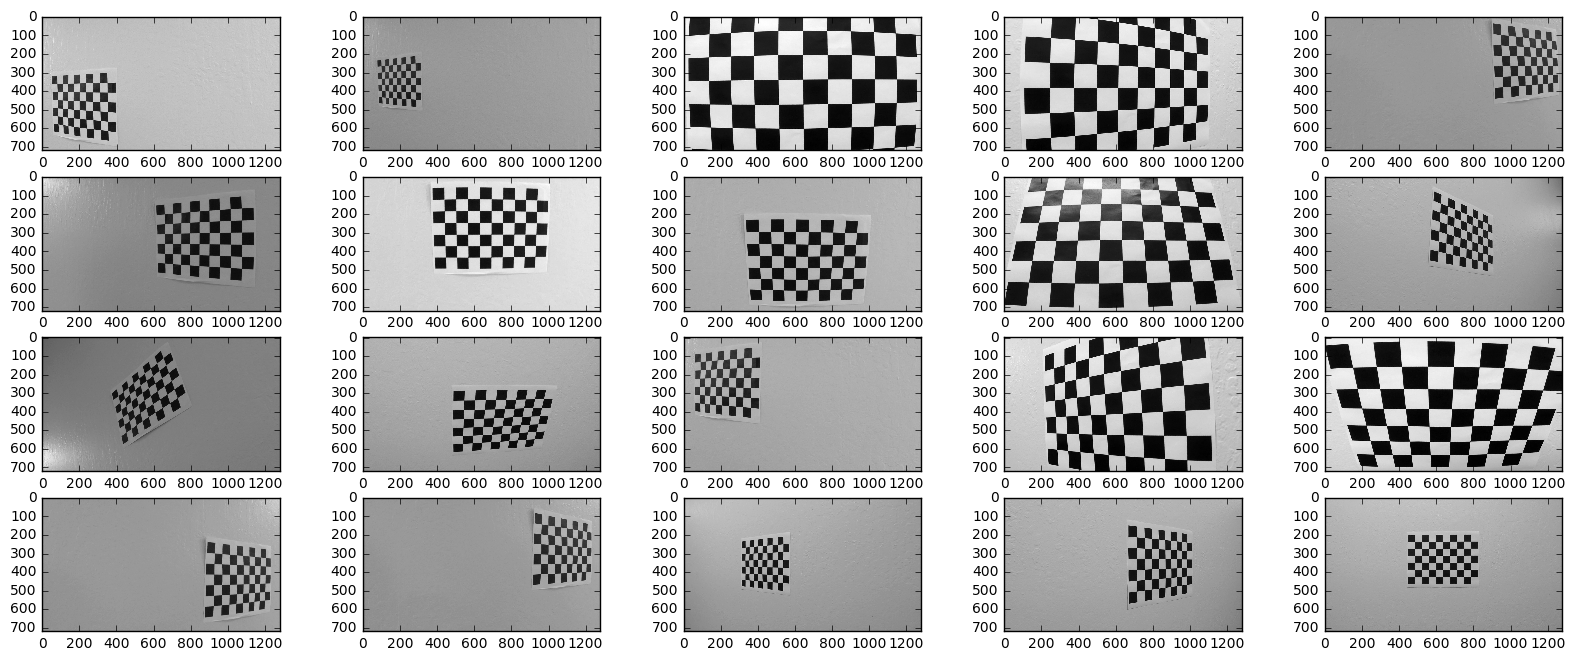

In [84]:
def plotImages(images, cmap='gray'):
    import glob
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline

    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image, cmap)

plotImages(images)

## Finding corners

In [85]:
def calibrateCamera(images):
    import cv2
    # Arrays to store object points and image points from all the images
    import numpy as np

    object_points = []
    image_points = []

    result_images = []
    for img in images:
        # detect chessboard corners
        pattern_found, corners = cv2.findChessboardCorners(img, (6,8), None)

        # if chessboard was detected: add object and image points
        if pattern_found:
            op = np.zeros((6*8,3), np.float32)
            op[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
            object_points.append(op)
            image_points.append(corners)
            
        print(pattern_found)

        # If found, draw corners
        if pattern_found:
            # prepare object points
            nx = 8# enter the number of inside corners in x
            ny = 6# enter the number of inside corners in y
            # Draw and display the corners
            cv2.drawChessboardCorners(img, (nx, ny), corners, pattern_found)
            result_images.append(img)
            plt.imshow(img)
            
    plotImages(result_images)

    print(object_points)
    
    #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, images[0].shape[::-1], None, None)
    
    #return mtx, dist

False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
[array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  0.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  0.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  0.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  3.,  0.],
       [ 5.,  3.,  0.],
       [ 6.,  3.,  0.],
       [ 7.,  3.,  0.],
       [ 0.,  4.,  0.],
       [ 1.,  4.,  0.],
       [ 2.,  4.,  0.],
       [ 3.,  4.,  0.],
       [ 4.,  4.,

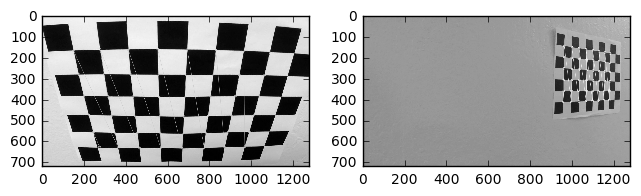

In [86]:
calibrateCamera(images)